importing stuff and loading our dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/laptop_price_edited.csv', encoding = 'latin1')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_usd
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,436.7600
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.0,840.7630
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,367.0,400.7273
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,682.0,744.6758
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,841.0,918.2879


preparing data

In [ ]:
data['target'] = (data['Price_usd']).astype(int)
del data['Price_usd']
categorical_columns = data.select_dtypes(include='object').columns.tolist()
data_features = data.drop(["target", "Price_euros"], axis=1)
numfeat = ["Inches"]
catfeat = ["Product", "ScreenResolution", "Weight", "TypeName", "Cpu", "Ram", "Gpu", "OpSys", "Memory"]

applying pipeline

In [ ]:
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
cat_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])
full_pipeline = ColumnTransformer([("num", num_pipeline, numfeat), ("cat", cat_pipeline, catfeat)])

In [ ]:
data.groupby("Company")["target"].mean().sort_values(ascending=False)

,target
Company,
Razer,3653.142857
LG,2291.333333
MSI,1887.277778
Google,1831.666667
Microsoft,1760.000000
Apple,1707.428571
Huawei,1554.000000
Samsung,1542.777778
Toshiba,1383.812500


In [ ]:
data_features = data[numfeat + catfeat]
datafeatpp = full_pipeline.fit_transform(data_features)
display(datafeatpp)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13030 stored elements and shape (1303, 1129)>

creating train and test splits

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = datafeatpp
y = data["target"].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

linear regression without regularization

R-squared score: 0.75
Mean Absolute Error (MAE): 237.84
Mean Squared Error (MSE): 112790.88
Root Mean Squared Error (RMSE): 335.84


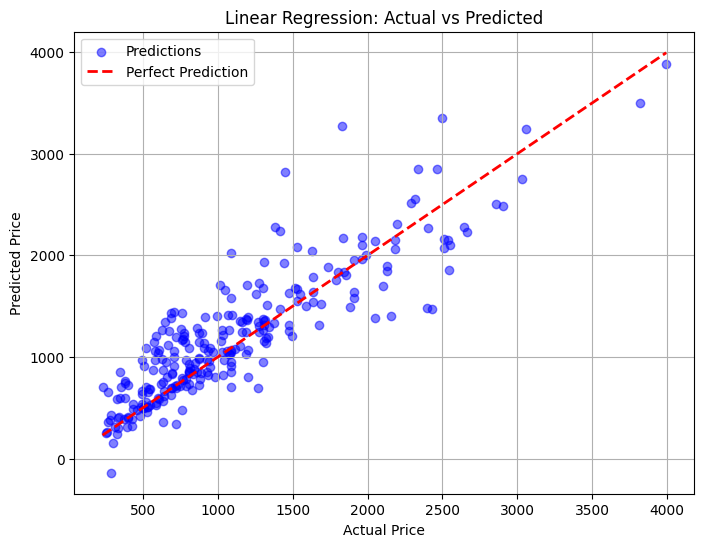

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linearpred = linear.predict(X_test)

print(f"R-squared score: {r2_score(y_test, linear.predict(X_test)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, linearpred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, linearpred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, linearpred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linearpred, color='blue', label="Predictions", alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2, label="Perfect Prediction", color = "red")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

linear regression with Lasso regularization

R-squared score: 0.88
Mean Absolute Error (MAE): 161.10
Mean Squared Error (MSE): 56178.49
Root Mean Squared Error (RMSE): 237.02


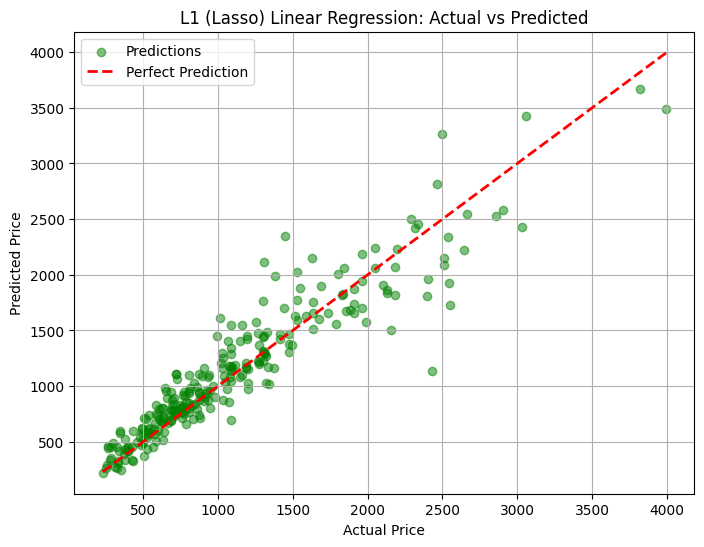

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.24)
lasso.fit(X_train, y_train)
lassopred = lasso.predict(X_test)

print(f"R-squared score: {r2_score(y_test, lasso.predict(X_test)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, lassopred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, lassopred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, lassopred):.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lassopred, color='green', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("L1 (Lasso) Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

k fold cross validation

In [ ]:
from sklearn import model_selection
als = [0.04, 0.08, 0.12, 0.16, 0.20, 0.24, 0.28, 0.32, 0.36, 0.40]
for al in als:
  kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
  model = Lasso(alpha=al, tol=0.01)
  result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
  print('alpha=', al, 'mean accuracy=%.2f%%' % (result_kfold.mean() * 100.0))

alpha= 0.04 mean accuracy=80.63%
alpha= 0.08 mean accuracy=80.85%
alpha= 0.12 mean accuracy=81.34%
alpha= 0.16 mean accuracy=81.71%
alpha= 0.2 mean accuracy=81.86%
alpha= 0.24 mean accuracy=81.93%
alpha= 0.28 mean accuracy=81.84%
alpha= 0.32 mean accuracy=81.69%
alpha= 0.36 mean accuracy=81.58%
alpha= 0.4 mean accuracy=81.50%


Our GitHub repo: https://github.com/tpenanen/Laptop-Price-Project